# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset diperoleh dari Kaggle dengan link [berikut ini](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification/data?select=train.csv)


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
#Type your code here
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import math
from sklearn.model_selection import GridSearchCV

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

**Fitur (Features):**

* Battery_Power: Kapasitas total energi yang dapat disimpan baterai dalam satu waktu, diukur dalam satuan mAh.

* Blu: Apakah ponsel memiliki Bluetooth atau tidak.

* Clock_speed: Kecepatan mikroprosesor dalam menjalankan instruksi.

* dual_sim: Apakah ponsel memiliki dukungan kartu SIM ganda (Dual SIM) atau tidak.

* fc: Resolusi kamera depan dalam satuan megapiksel.

* four_g: Apakah ponsel memiliki jaringan 4G atau tidak.

* int_memory: Kapasitas memori internal dalam satuan gigabyte (GB).

* m_dep: Ketebalan ponsel dalam satuan cm.

* mobile_wt: Berat ponsel.

* n_cores: Jumlah inti (cores) pada prosesor.

* pc: Resolusi kamera utama (belakang) dalam satuan megapiksel.

* px_height: Tinggi resolusi layar dalam piksel.

* px_width: Lebar resolusi layar dalam piksel.

* ram: Memori Akses Acak (Random Access Memory) dalam satuan megabyte (MB).

* Sc_h: Tinggi layar ponsel dalam satuan cm.

* Sc_w: Lebar layar ponsel dalam satuan cm.

* talk_time: Durasi terlama baterai dapat bertahan dalam satu kali pengisian daya saat digunakan untuk berbicara.

* three_g: Apakah ponsel memiliki jaringan 3G atau tidak.

* touch_screen: Apakah ponsel memiliki layar sentuh (touch screen) atau tidak.

* wifi: Apakah ponsel memiliki fitur WiFi atau tidak.

* Price_range: Ini adalah variabel target (label klasifikasi) dengan nilai:
  * 0: Biaya rendah (low cost)
  * 1: Biaya sedang (medium cost)
  * 2: Biaya tinggi (high cost)
  * 3: Biaya sangat tinggi (very high cost)

In [2]:
#Type your code here
local_zip = '/content/archive.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
train = pd.read_csv('/content/train.csv')
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
test = pd.read_csv('/content/test.csv')
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

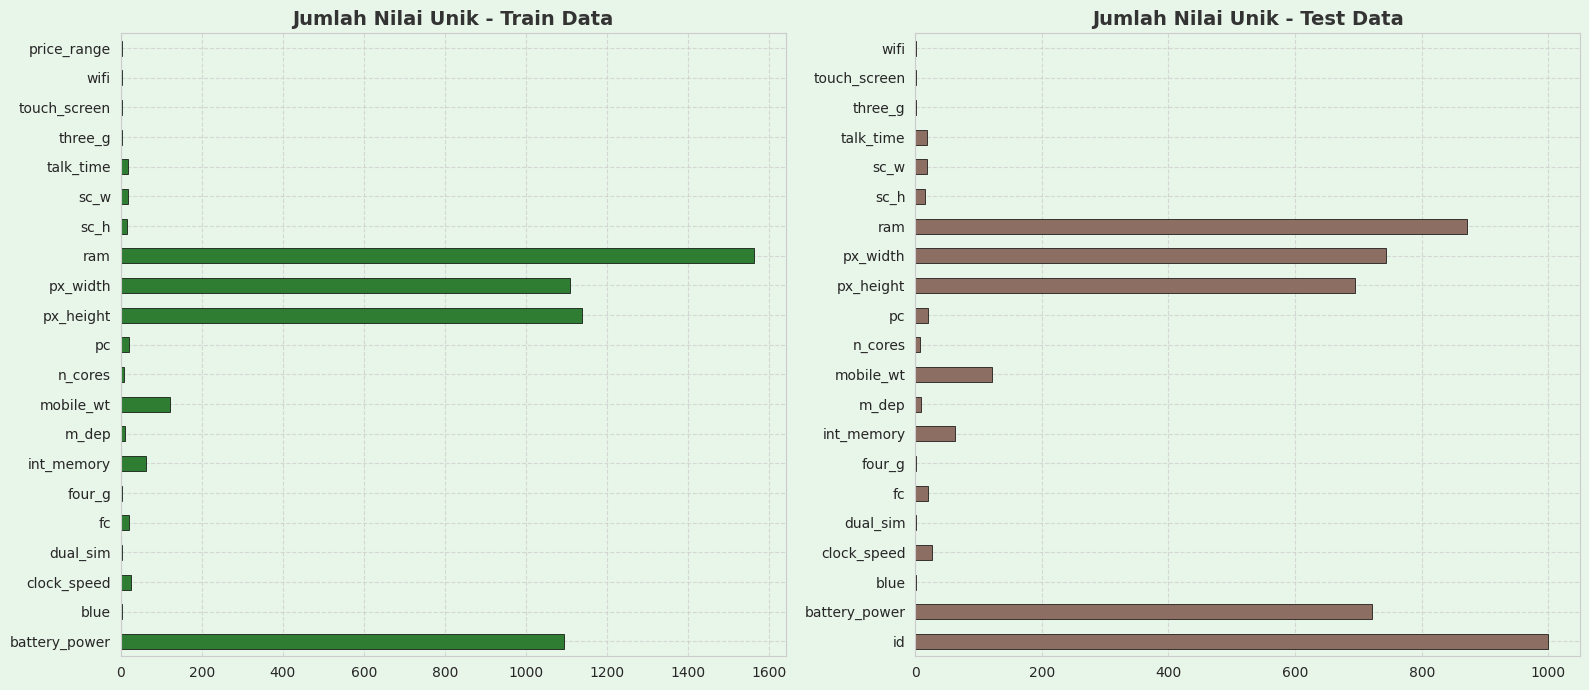

In [5]:
#Type your code here
bg_color = '#e8f5e9'
colors = {
    'train': '#2e7d32',
    'test':  '#8d6e63'
}


sns.set_style('whitegrid')

fig, axes = plt.subplots(1, 2, figsize=(16, 7), dpi=100)
fig.set_facecolor(bg_color)

train.nunique().plot(kind='barh', ax=axes[0], color=colors['train'], edgecolor='black', linewidth=0.5)
axes[0].set_title('Jumlah Nilai Unik - Train Data', fontsize=14, fontweight='bold', color='#333333')
axes[0].set_facecolor(bg_color)
axes[0].grid(True, linestyle='--', alpha=0.7)

test.nunique().plot(kind='barh', ax=axes[1], color=colors['test'], edgecolor='black', linewidth=0.5)
axes[1].set_title('Jumlah Nilai Unik - Test Data', fontsize=14, fontweight='bold', color='#333333')
axes[1].set_facecolor(bg_color)
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

1. Berdasarkan grafik di atas, terlihat bahwa jumlah nilai unik pada kolom 'ID' setara dengan total sampel data uji. Hal ini menunjukkan bahwa kolom tersebut tidak memiliki nilai prediktif bagi model, sehingga perlu dieliminasi dari dataset.

2. Visualisasi tersebut juga membantu dalam mengidentifikasi jenis variabel. Kolom dengan jumlah nilai unik yang sangat tinggi dapat dikategorikan sebagai variabel kontinu, sedangkan kolom dengan nilai unik yang sedikit dapat dianggap sebagai variabel kategorikal.

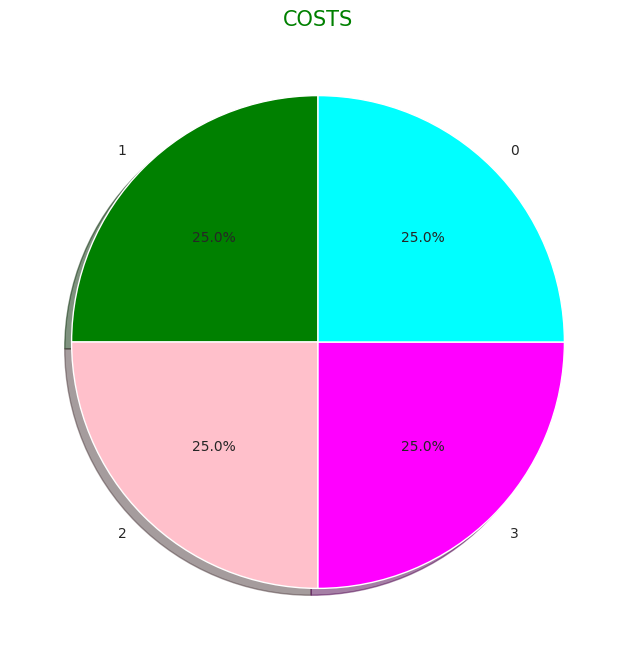

In [6]:
labels = train["price_range"].value_counts().index
sizes = train["price_range"].value_counts()
colors = ['green','pink','magenta','cyan']
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=90)
plt.title('COSTS',color = 'green',fontsize = 15)
plt.show()

Berdasarkan data diatas kuantitas dari variable target terlihat seimbang diantara kelas kelas target.

In [7]:
train_without_target=train.drop('price_range',axis=1)

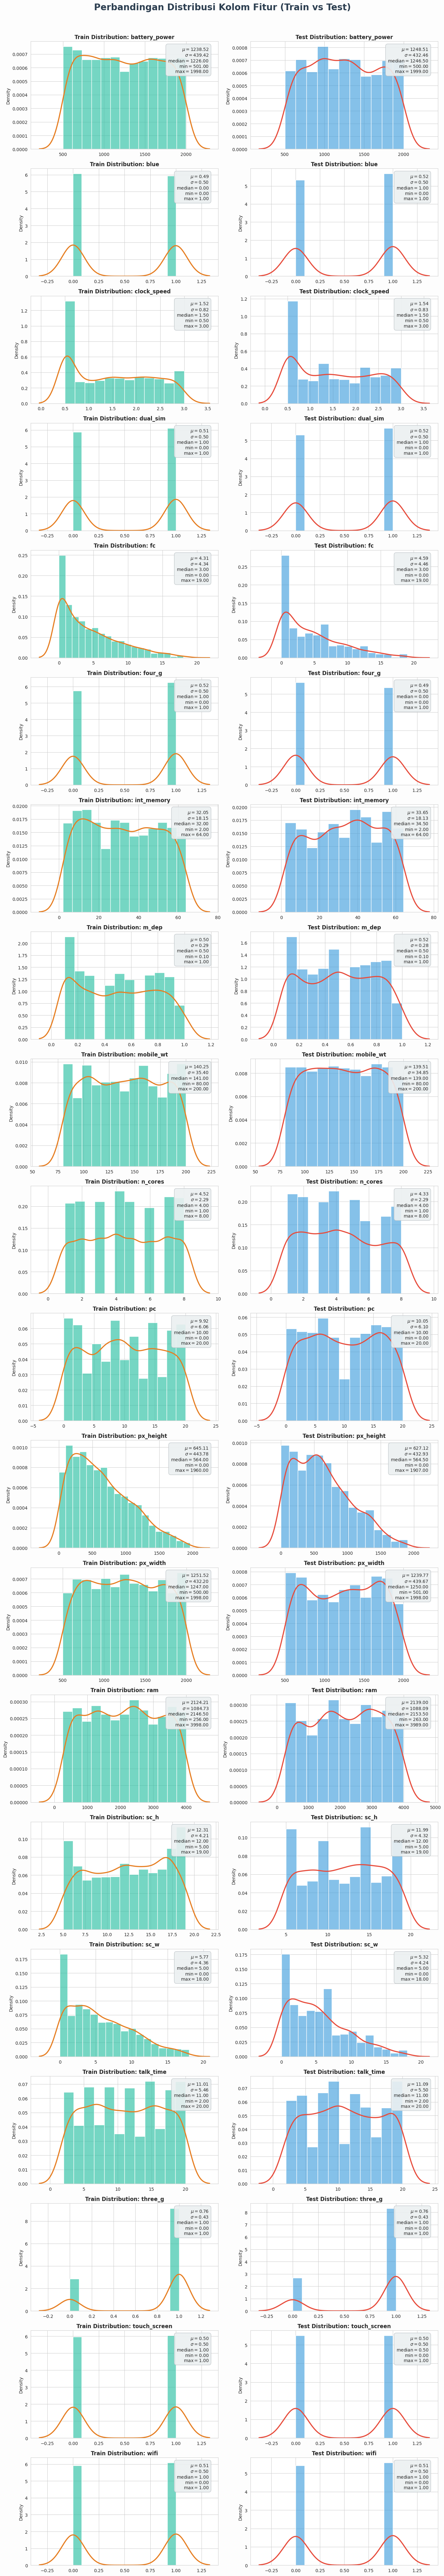

In [8]:

sns.set_style('whitegrid')
hist_color = "#1abc9c"
kde_color  = "#e67e22"
text_bg    = "#ecf0f1"

features = list(train.drop('price_range',axis=1).columns.values)
n_features = len(features)


def get_stat_text(data_series):
    """Membuat string statistik deskriptif untuk ditampilkan di plot."""
    return '\n'.join((
        r'$\mu=%.2f$' % data_series.mean(),
        r'$\sigma=%.2f$' % data_series.std(),
        r'$\mathrm{median}=%.2f$' % np.median(data_series),
        r'$\mathrm{min}=%.2f$' % data_series.min(),
        r'$\mathrm{max}=%.2f$' % data_series.max()
    ))


fig, axes = plt.subplots(nrows=n_features, ncols=2, figsize=(14, 4 * n_features))
fig.patch.set_facecolor('#fdfdfd')

for i, col in enumerate(features):
    ax_train = axes[i, 0]
    sns.histplot(x=col, data=train_without_target, color=hist_color, stat="density", common_norm=False, ax=ax_train, alpha=0.6)
    sns.kdeplot(x=col, data=train_without_target, color=kde_color, linewidth=2.5, ax=ax_train)

    ax_train.set_title(f'Train Distribution: {col}', fontweight='bold', fontsize=12)
    ax_train.set_xlabel('')

    stats_train = get_stat_text(train_without_target[col])
    ax_train.text(0.95, 0.95, stats_train, transform=ax_train.transAxes, fontsize=10,
                  verticalalignment='top', horizontalalignment='right',
                  bbox=dict(boxstyle='round', facecolor=text_bg, edgecolor='#bdc3c7', pad=0.5, alpha=0.9))

    ax_test = axes[i, 1]
    sns.histplot(x=col, data=test, color="#3498db", stat="density", common_norm=False, ax=ax_test, alpha=0.6)
    sns.kdeplot(x=col, data=test, color="#e74c3c", linewidth=2.5, ax=ax_test)

    ax_test.set_title(f'Test Distribution: {col}', fontweight='bold', fontsize=12)
    ax_test.set_xlabel('')

    stats_test = get_stat_text(test[col])
    ax_test.text(0.95, 0.95, stats_test, transform=ax_test.transAxes, fontsize=10,
                  verticalalignment='top', horizontalalignment='right',
                  bbox=dict(boxstyle='round', facecolor=text_bg, edgecolor='#bdc3c7', pad=0.5, alpha=0.9))

plt.suptitle("Perbandingan Distribusi Kolom Fitur (Train vs Test)", y=1.005, fontsize=20, fontweight="bold", color='#2c3e50')
plt.tight_layout()
plt.show()

**Insight :**

1. Kualitas Data : Distribusi data Train dan Test identik. Ini berarti pembagian data dilakukan dengan baik.

2. Karakteristik Fitur: Uniform (Rata): Banyak fitur numerik (RAM, Battery) tersebar merata.

3. Skewed: Fitur seperti kamera (fc) dan resolusi layar memiliki pola alami (banyak di nilai rendah, sedikit di tinggi).

4. Langkah Selanjutnya :
  * Scaling: Rentang nilai antar fitur sangat timpang (misal: ram ribuan vs clock_speed satuan). Sehingga perlu penangganan menggunakan StandardScaler atau MinMaxScaler terutama jika memakai KNN atau SVM.

  * Imbalance: Fitur three_g didominasi nilai 1. Sehingga perlu dilakukan korelasi matrix untuk menilai korelasi fitur dengan target, jika rendah dapat dipertimbangkan untuk di-drop.

In [9]:
numerical_columns=['battery_power','clock_speed', 'fc', 'int_memory','m_dep','mobile_wt','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']
categorical_columns=['blue','dual_sim','four_g','n_cores', 'three_g','touch_screen','wifi']

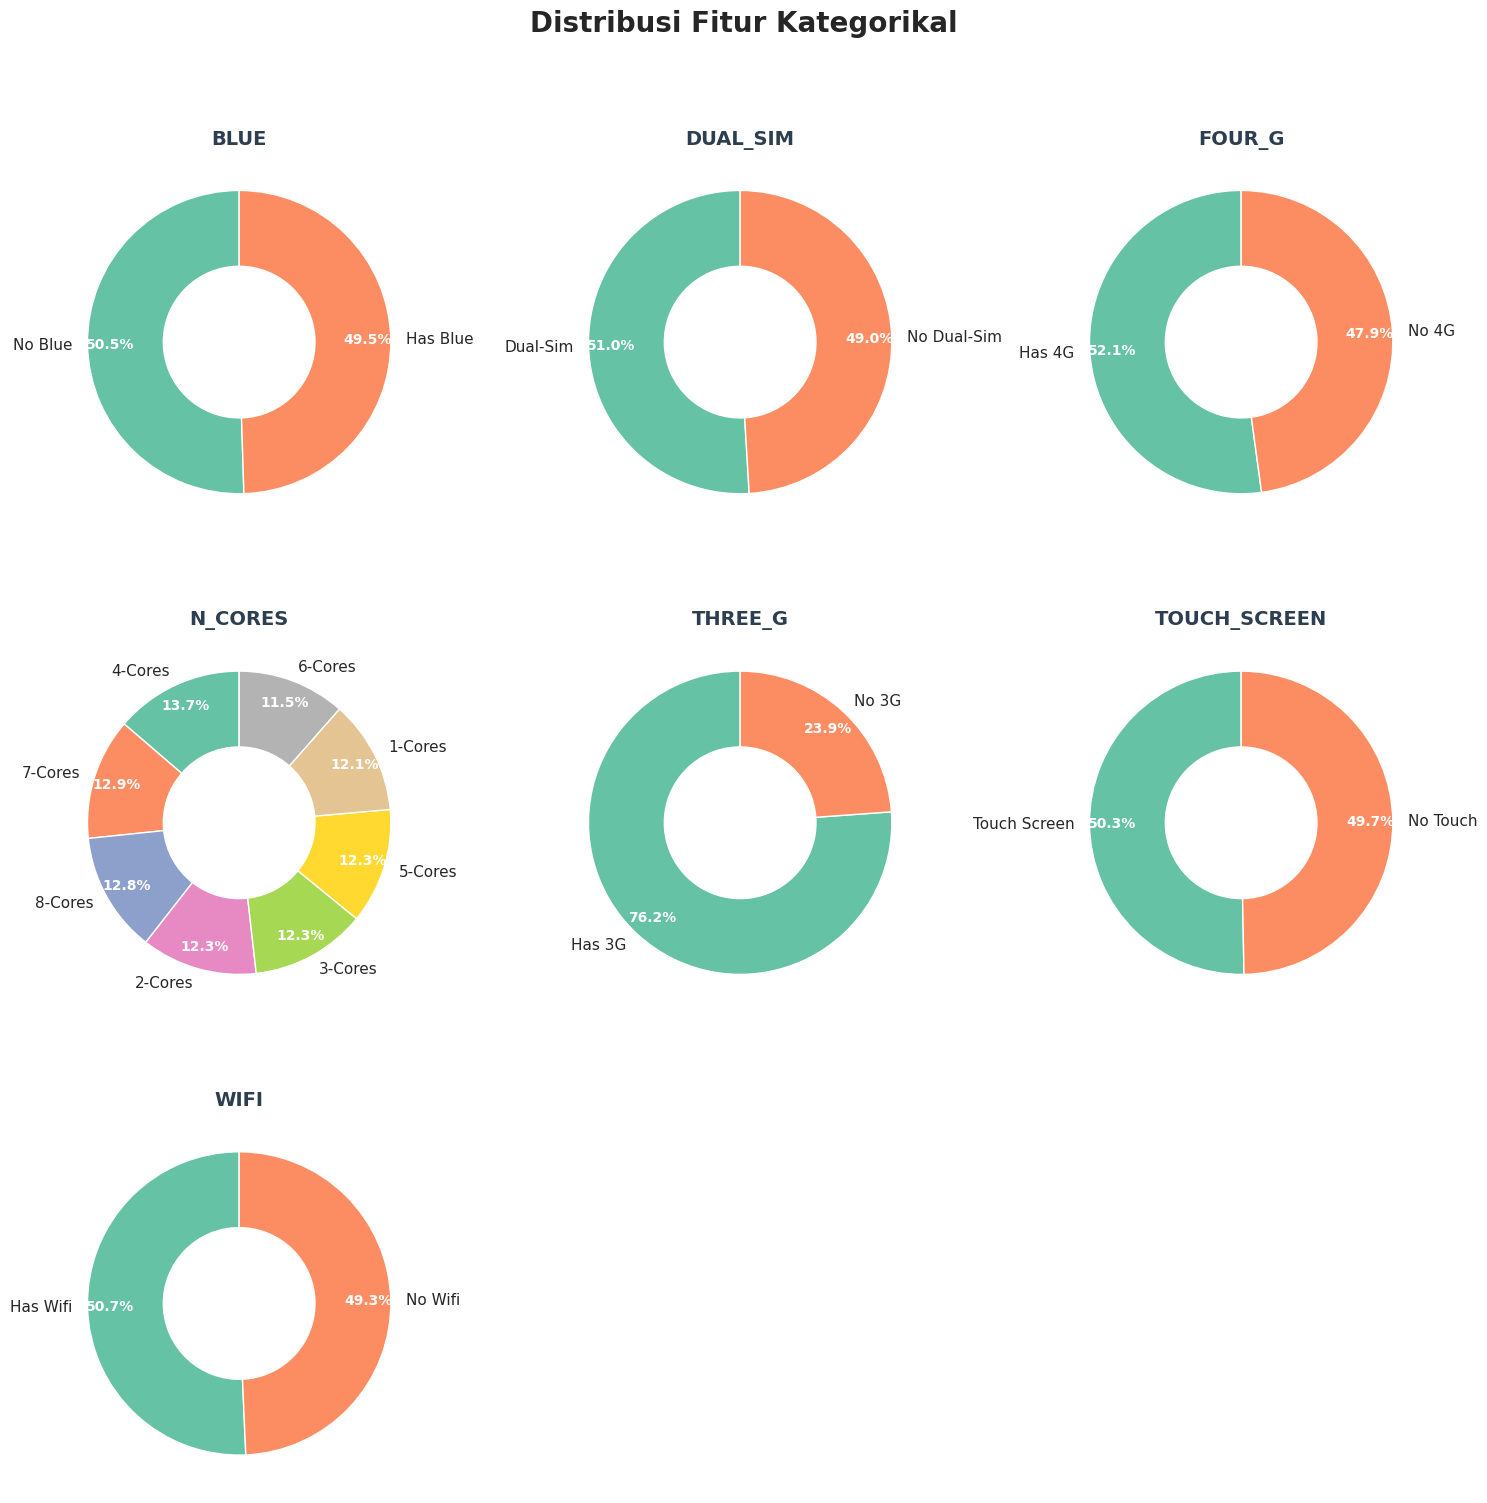

In [10]:

label_mapping = {
    'blue':         {0: 'No Blue', 1: 'Has Blue'},
    'dual_sim':     {0: 'No Dual-Sim', 1: 'Dual-Sim'},
    'four_g':       {0: 'No 4G', 1: 'Has 4G'},
    'three_g':      {0: 'No 3G', 1: 'Has 3G'},
    'touch_screen': {0: 'No Touch', 1: 'Touch Screen'},
    'wifi':         {0: 'No Wifi', 1: 'Has Wifi'},
    'n_cores':      {i: f'{i}-Cores' for i in range(1, 9)}
}

new_train = train.replace(label_mapping)

cols_layout = 3
rows_layout = math.ceil(len(categorical_columns) / cols_layout)

fig, axes = plt.subplots(rows_layout, cols_layout, figsize=(15, 5 * rows_layout))
fig.suptitle('Distribusi Fitur Kategorikal', fontsize=20, fontweight='bold', y=1.02)

palette = sns.color_palette("Set2")

axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    ax = axes[i]

    data_counts = new_train[col].value_counts()
    labels = data_counts.index
    values = data_counts.values

    wedges, texts, autotexts = ax.pie(
        values,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=palette,
        pctdistance=0.85,
        wedgeprops=dict(width=0.5, edgecolor='white')
    )

    plt.setp(autotexts, size=10, weight="bold", color="white")
    plt.setp(texts, size=11)

    ax.set_title(col.upper(), fontsize=14, fontweight='bold', color='#2c3e50')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Insight Data Train (Kategorikal)**
1. Kondisi Balanced
    * Fitur biner seperti BLUE, DUAL_SIM, FOUR_G, TOUCH_SCREEN, dan WIFI memiliki proporsi 50:50.

    * Dampaknya: Model akan belajar mengenali karakteristik "Ada" dan "Tidak Ada" dengan bobot yang cukup mirip. Sehingga, resiko model menjadi bias terhadap salah satu kategori menjadi berkurang.

2. Fitur N_CORES Seragam

    * Model tidak akan memprioritaskan jumlah core tertentu sebagai "standar". Setiap varian core dianggap sama pentingnya.


**Kesimpulan untuk Strategi Modeling:**

* Karena data train kategorikal sudah bersih dan seimbang
Tidak perlu teknik Oversampling/Undersampling untuk fitur-fitur ini.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

**Mengecek dan menghapus atau Menangani Data Kosong (Missing Values)**

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [13]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [14]:
test.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [15]:
train.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [16]:
test.isnull().sum()

,0
id,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0


Terlihat bahwa tidak terdapat missing value, sehingga tidak perlu dilakukan penangganan khusus

**Duplicate Removal**

In [17]:
train.drop_duplicates(inplace=True)
train.shape

(2000, 21)

In [18]:
test.drop_duplicates(inplace=True)
test.shape

(1000, 21)

Terlihat bahwa setelah dilakukan duplicate removal data masih dengan jumlah yang sama dengan data awal. Hal ini menandakan bahwa data train dan test tidak memiliki nilai duplikat.

### **Feature Standardization (StandardScaler)**

Tahap ini menerapkan **Standard Scaler** pada fitur numerik. Standardisasi mengubah distribusi data sehingga memiliki rata-rata ($\mu$) 0 dan standar deviasi ($\sigma$) 1.

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train[numerical_columns] = scaler.fit_transform(train[numerical_columns])

test[numerical_columns] = scaler.transform(test[numerical_columns])

print("Training data after standardization :")
display(train[numerical_columns].head())

print("Test data after standardization :")
display(test[numerical_columns].head())

Training data after standardization :


,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,-0.902597,0.830779,-0.762495,-1.380644,0.340740,1.349249,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493
1,-0.495139,-1.253064,-0.992890,1.155024,0.687548,-0.120059,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267
2,-1.537686,-1.253064,-0.532099,0.493546,1.381165,0.134244,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140
3,-1.419319,1.198517,-0.992890,-1.215274,1.034357,-0.261339,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014
4,1.325906,-0.395011,2.002254,0.658915,0.340740,0.021220,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240


Test data after standardization :


,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,-0.445060,0.340463,2.232650,-1.490890,-1.393304,1.490528,1.003414,-0.944639,0.371413,1.246506,-0.072765,0.283103,-1.649584
1,-0.904874,-1.253064,-0.071307,1.596010,1.034357,1.434017,0.343653,0.227403,-0.913037,1.632873,-1.497202,-1.324131,-0.734267
2,1.294038,1.566254,-0.762495,-0.278179,1.381165,1.292737,-0.975869,1.408462,0.264954,0.250619,1.114266,0.971917,-0.185077
3,0.699922,-1.253064,3.154233,-0.388426,-0.006069,-1.250297,1.663176,-0.789118,1.158284,1.631029,-0.547577,-1.324131,-0.734267
4,0.444976,-0.149853,1.541463,0.934531,-0.006069,-0.911225,1.333295,0.234165,-1.021810,-0.323860,0.639453,0.512708,-0.734267


### **Outlier Removal (IQR Method)**

Menghapus outlier dengan metode IQR untuk data numerik yang sudah dilakukan strandardization

In [20]:
Q1 = train[numerical_columns].quantile(0.25)
Q3 = train[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_mask = ((train[numerical_columns] < lower_bound) | (train[numerical_columns] > upper_bound)).any(axis=1)

num_outliers = outlier_mask.sum()
print(f"Number of outliers detected: {num_outliers}")

train_no_outliers = train[~outlier_mask]
print(f"Original train data shape: {train.shape}")
print(f"Train data shape after outlier removal: {train_no_outliers.shape}")

train = train_no_outliers.copy() # Update train DataFrame



Number of outliers detected: 20
Original train data shape: (2000, 21)
Train data shape after outlier removal: (1980, 21)


### **Encoding Data Kategorikal (One-Hot Encoding)**

Untuk data kategorikal, terutama yang nominal, One-Hot Encoding adalah metode umum untuk mengubahnya menjadi format numerik yang dapat digunakan oleh model machine learning. Meskipun beberapa kolom biner (`blue`, `dual_sim`, dll.) sudah dalam format 0/1, applying One-Hot Encoding secara eksplisit memperlakukan setiap nilai unik sebagai kategori terpisah. Kolom `n_cores` (jumlah inti) juga akan di-encode sebagai fitur nominal.

`pd.get_dummies` akan membuat kolom biner baru untuk setiap kategori unik dalam fitur-fitur yang dipilih.

In [22]:
import pandas as pd

test_processed = test.drop('id', axis=1)

train_encoded = pd.get_dummies(train, columns=categorical_columns, drop_first=True, dtype=int)

test_encoded = pd.get_dummies(test_processed, columns=categorical_columns, drop_first=True, dtype=int)


print("Training data after One-Hot Encoding (first 5 rows of selected columns):")
display(train_encoded.head())

print("Test data after One-Hot Encoding (first 5 rows of selected columns):")
display(test_encoded.head())

train = pd.concat([train, train_encoded], axis = 1)
test = pd.concat([test, test_encoded], axis = 1)

for i in categorical_columns:
  train.drop(i, axis=1, inplace=True)
  test.drop(i, axis=1, inplace=True)


Training data after One-Hot Encoding (first 5 rows of selected columns):


,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,...,n_cores_2,n_cores_3,n_cores_4,n_cores_5,n_cores_6,n_cores_7,n_cores_8,three_g_1,touch_screen_1,wifi_1
0,-0.902597,0.830779,-0.762495,-1.380644,0.340740,1.349249,-1.305750,-1.408949,-1.146784,0.391703,...,1,0,0,0,0,0,0,0,0,1
1,-0.495139,-1.253064,-0.992890,1.155024,0.687548,-0.120059,-0.645989,0.585778,1.704465,0.467317,...,0,1,0,0,0,0,0,1,1,0
2,-1.537686,-1.253064,-0.532099,0.493546,1.381165,0.134244,-0.645989,1.392684,1.074968,0.441498,...,0,0,0,1,0,0,0,1,1,0
3,-1.419319,1.198517,-0.992890,-1.215274,1.034357,-0.261339,-0.151168,1.286750,1.236971,0.594569,...,0,0,0,0,1,0,0,1,0,0
4,1.325906,-0.395011,2.002254,0.658915,0.340740,0.021220,0.673534,1.268718,-0.091452,-0.657666,...,1,0,0,0,0,0,0,1,1,0


Test data after One-Hot Encoding (first 5 rows of selected columns):


,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,...,n_cores_2,n_cores_3,n_cores_4,n_cores_5,n_cores_6,n_cores_7,n_cores_8,three_g_1,touch_screen_1,wifi_1
0,-0.445060,0.340463,2.232650,-1.490890,-1.393304,1.490528,1.003414,-0.944639,0.371413,1.246506,...,0,1,0,0,0,0,0,0,1,0
1,-0.904874,-1.253064,-0.071307,1.596010,1.034357,1.434017,0.343653,0.227403,-0.913037,1.632873,...,0,0,0,1,0,0,0,1,0,0
2,1.294038,1.566254,-0.762495,-0.278179,1.381165,1.292737,-0.975869,1.408462,0.264954,0.250619,...,0,1,0,0,0,0,0,0,1,1
3,0.699922,-1.253064,3.154233,-0.388426,-0.006069,-1.250297,1.663176,-0.789118,1.158284,1.631029,...,0,0,0,0,0,0,1,1,1,0
4,0.444976,-0.149853,1.541463,0.934531,-0.006069,-0.911225,1.333295,0.234165,-1.021810,-0.323860,...,0,0,0,0,1,0,0,1,0,1


In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1980 entries, 0 to 1999
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   1980 non-null   float64
 1   clock_speed     1980 non-null   float64
 2   fc              1980 non-null   float64
 3   int_memory      1980 non-null   float64
 4   m_dep           1980 non-null   float64
 5   mobile_wt       1980 non-null   float64
 6   pc              1980 non-null   float64
 7   px_height       1980 non-null   float64
 8   px_width        1980 non-null   float64
 9   ram             1980 non-null   float64
 10  sc_h            1980 non-null   float64
 11  sc_w            1980 non-null   float64
 12  talk_time       1980 non-null   float64
 13  price_range     1980 non-null   int64  
 14  battery_power   1980 non-null   float64
 15  clock_speed     1980 non-null   float64
 16  fc              1980 non-null   float64
 17  int_memory      1980 non-null   float6

### **Export Data**

Setelah tahap preprocessing selesai, data `train` dan `test` kini siap untuk digunakan dalam tahap pelatihan model. Bagian ini akan mengekspor kedua dataset tersebut ke format CSV agar dapat disimpan atau digunakan kembali di kemudian hari.

In [23]:


train.to_csv('train_processed.csv', index=False)
print("Processed train data exported to 'train_processed.csv'")

test.to_csv('test_processed.csv', index=False)
print("Processed test data exported to 'test_processed.csv'")

Processed train data exported to 'train_processed.csv'
Processed test data exported to 'test_processed.csv'
